<a href="https://colab.research.google.com/github/samezqui/fullofstars/blob/skymap/astropy_FullofStars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install pandas
!pip install skyfield

from skyfield.api import Star, load
from skyfield.data import hipparcos



/usr/local/lib/python3.6/dist-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


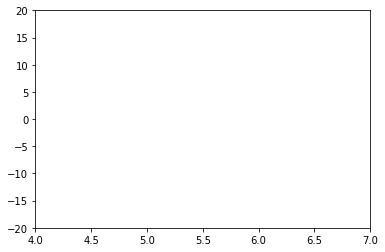

In [7]:
with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)
    
barnards_star = Star.from_dataframe(df.loc[87937]) # fastest star moving

planets = load('de421.bsp')
earth = planets['earth']

ts = load.timescale()
t = ts.now()
astrometric = earth.at(t).observe(barnards_star)
ra, dec, distance = astrometric.radec()

from matplotlib import pyplot as plt
plt.scatter(ra.hours, dec.degrees, 10 - df['magnitude'], 'k')
plt.xlim(4,7 )
plt.ylim(-20, 20)
plt.savefig('barnards_star.png')

# couldn't find barnard's star

After filtering, there are 93 stars
There are 93 right ascensions
and 93 declinations
 
Super cool but not what I need. Not relative positions from earth 


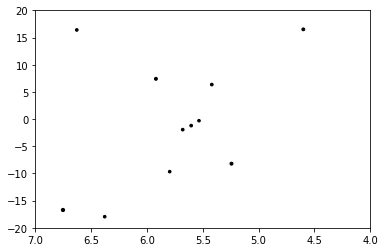

In [10]:
# you need to load everytime you filter!!

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f) 
    
df = df[df['magnitude'] <= 2.5] # Bigger number = more stars 
print('After filtering, there are {} stars'.format(len(df)))

bright_stars = Star.from_dataframe(df)

t = ts.now()
  # ts.utc(2018, 9, 3)
  # time doesn't matter??? 
astrometric = earth.at(t).observe(bright_stars)
ra, dec, distance = astrometric.radec()

print('There are {} right ascensions'.format(len(ra.hours)))
print('and {} declinations'.format(len(dec.degrees)))

from matplotlib import pyplot as plt
plt.scatter(ra.hours, dec.degrees, 9 - df['magnitude'], 'k')
plt.xlim(7, 4)
plt.ylim(-20, 20)
# plt.savefig('bright_stars.png')
print(' ')
print('Super cool but not what I need. Not relative positions from earth ')

# Generating Positions of Stars

The zenith is the point exactly overheard when you look up from the ground. Which is 90 degs from the horizon. 90degs Altitude

In [11]:
from skyfield.positionlib import ICRF

x = 3141.0
y = 2718.0
z = 5820.0
vec = ICRF([x, y, z]) 

from skyfield.api import Star, Topos, load

ts = load.timescale()
t = ts.now()
# tying in time
# https://rhodesmill.org/skyfield/time.html 

planets = load('de421.bsp')
mars = planets['mars']
barnard = Star(ra_hours=(17, 57, 48.49803),
               dec_degrees=(4, 41, 36.2072))


# From the center of the Earth (Geocentric)

earth = planets['earth']
astrometric = earth.at(t).observe(mars)
apparent = earth.at(t).observe(mars).apparent()
  # can replace mars with barnard
  
 
# From a place on Earth (Topocentric)

boston = earth + Topos('42.3583 N', '71.0603 W')
astrometric = boston.at(t).observe(mars)
apparent = boston.at(t).observe(mars).apparent()
  # can replace mars with barnard 
  
  
# Altitude and azimuth in the sky of a
# specific geographic location


astro = boston.at(ts.utc(1980, 3, 1)).observe(mars)
app = astro.apparent()

alt, az, distance = app.altaz()
print(alt.dstr())
print(az.dstr())
print(distance)

print('So Mars was more than 24° above the horizon for Bostonians on 1980 March 1 at midnight UTC.')

24deg 30' 27.2"
93deg 04' 29.5"
0.678874 au
So Mars was more than 24° above the horizon for Bostonians on 1980 March 1 at midnight UTC.


#Weather Affects Refraction of Light from Stars
The altitude returned from a plain altaz() call is the ideal position that you would observe if the Earth had no atmosphere. You can also ask Skyfield to estimate where an object might actually appear in the sky after the Earth’s atmosphere has refracted its image higher. If you know the weather conditions, you can specify them.

In [12]:
alt, az, distance = app.altaz(temperature_C=15.0,
                              pressure_mbar=1005.0)
# or use standard for rough simulation 
# alt, az, distance = app.altaz('standard')
print(alt.dstr())

24deg 32' 34.1"


#Figuring out how to plot

We're gonna use Astropy


In [0]:
!pip install astropy
from astropy.time import Time
from skyfield.api import load

atime = Time('2010-01-01T00:00:00', scale='utc')
print(atime)

ts = load.timescale()
t = ts.from_astropy(atime)
print(t.utc_jpl())

# Convert Positions 
import astropy.units as u
from skyfield.api import load

planets = load('de421.bsp')
earth = planets['earth']

ts = load.timescale()
t = ts.utc(1980, 1, 1)
apparent = earth.at(t)

print(apparent.position.to(u.au))
print(apparent.velocity.to(u.au / u.day))

2010-01-01T00:00:00.000
A.D. 2010-Jan-01 00:00:00.0000 UT
[-0.16287311  0.88787399  0.38473904] AU
[-0.01721258 -0.00279426 -0.0012121 ] AU / d
